In [1]:
import pandas as pd
import numpy as np

1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [2]:
df=pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [3]:
dfpv=df.pivot_table(values='signs_of_mental_illness', index='race', aggfunc=[len, np.sum])
dfpv.columns=['all','mental_illness_yes']
dfpv['mental_illness_no']=dfpv['all']-dfpv['mental_illness_yes']
dfpv

,all,mental_illness_yes,mental_illness_no
race,,,
A,93,24,69
B,1298,184,1114
H,902,157,745
N,78,14,64
O,48,11,37
W,2476,713,1763


3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [4]:
dfpv['percentage_[%]'] = dfpv.apply(lambda row: ((row['mental_illness_yes']/row['all'])*100).round(2),axis=1)
dfpv

,all,mental_illness_yes,mental_illness_no,percentage_[%]
race,,,,
A,93,24,69,25.81
B,1298,184,1114,14.18
H,902,157,745,17.41
N,78,14,64,17.95
O,48,11,37,22.92
W,2476,713,1763,28.80


In [5]:
dfpv['percentage_[%]'].idxmax()

'W'

4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [6]:
df['date']=pd.to_datetime(df['date'])
df['day_num']=df['date'].dt.dayofweek
df['day_of_week'] = df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_num,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,4,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,4,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,5,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,6,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,6,Sunday


In [7]:
df=df.sort_values('day_num')
dfw=pd.DataFrame(df.groupby('day_num').count()['id'])
day_dict = dict(zip(df['day_num'].unique(),df['day_of_week'].unique()))
day_dict

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [8]:
dfw['day']=dfw.index.map(day_dict)
dfw

,id,day
day_num,,
0,726,Monday
1,816,Tuesday
2,829,Wednesday
3,810,Thursday
4,761,Friday
5,721,Saturday
6,753,Sunday


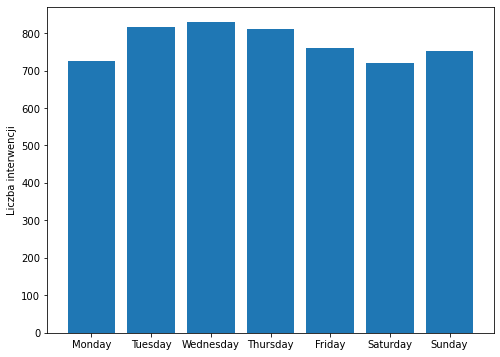

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize=(8,6))

ax.bar(dfw.day,dfw.id)
ax.set_ylabel('Liczba interwencji')
plt.show()

5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [10]:
pop = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
dfpop = pd.DataFrame(pop[0]).iloc[:, 2:4]
dfpop.columns=['state','population']
dfpop.head(10)

,state,population
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989
5,Pennsylvania,12671821
6,Ohio,11689100
7,Georgia,10617423
8,North Carolina,10488084
9,Michigan,9986857


In [11]:
abb = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations',
                    skiprows=11)
dfabb = pd.DataFrame(abb[0]).iloc[:, [0,5]]
dfabb.columns=['state','abb']
dfabb.head(10)

,state,abb
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [12]:
dffin=dfabb.merge(dfpop)
dffin.head(10)

,state,abb,population
0,Alabama,AL,4903185
1,Alaska,AK,731545
2,Arizona,AZ,7278717
3,Arkansas,AR,3017825
4,California,CA,39512223
5,Colorado,CO,5758736
6,Connecticut,CT,3565287
7,Delaware,DE,973764
8,District of Columbia,DC,705749
9,Florida,FL,19453561


In [13]:
df_pv_state=df.pivot_table(values='id', index='state', aggfunc=len)
df_pv_state.reset_index(inplace=True)
df_pv_state.columns=['abb','cases']
df_pv_state.head(10)

,abb,cases
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799
5,CO,195
6,CT,21
7,DC,13
8,DE,13
9,FL,350


In [14]:
dffin=dffin.merge(df_pv_state)
dffin.head(10)

,state,abb,population,cases
0,Alabama,AL,4903185,104
1,Alaska,AK,731545,39
2,Arizona,AZ,7278717,254
3,Arkansas,AR,3017825,83
4,California,CA,39512223,799
5,Colorado,CO,5758736,195
6,Connecticut,CT,3565287,21
7,Delaware,DE,973764,13
8,District of Columbia,DC,705749,13
9,Florida,FL,19453561,350


In [15]:
dffin['per_1000_citizens'] = dffin.apply(lambda row: (row['cases']*1000)/row['population'], axis=1)

In [16]:
dffin

,state,abb,population,cases,per_1000_citizens
0,Alabama,AL,4903185,104,0.021211
1,Alaska,AK,731545,39,0.053312
2,Arizona,AZ,7278717,254,0.034896
3,Arkansas,AR,3017825,83,0.027503
4,California,CA,39512223,799,0.020222
5,Colorado,CO,5758736,195,0.033862
6,Connecticut,CT,3565287,21,0.005890
7,Delaware,DE,973764,13,0.013350
8,District of Columbia,DC,705749,13,0.018420
9,Florida,FL,19453561,350,0.017992
